<a href="https://colab.research.google.com/github/cristiandarioortegayubro/P4DA/blob/main/pandas_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://github.com/cristiandarioortegayubro/P4DA/blob/main/Logo.png?raw=true)

![](https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20Pandas.png?raw=true)

<p><font color="RoyalBlue">

💙 **En este cuaderno continuamos con el desarrollo de los temás más  utilizados del módulo Pandas...**
</p></font>

[Graficos de Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot)

<p align=justify><b><font color="RoyalBlue">🐼 Los graficos que usamos con el metodo <code>plot()</code> de pandas, nos permiten hacer gráficos rápidos sin la necesidad de habilitar alguna biblioteca gráfica. Si bien estos gráficos son límitados en cuanto a su funcionalidad, estos gráficos se basan en los gráficos de la biblioteca <code>matplotlib</code> a traves de una api de pandas. </font></b></p>

# **<font color="RoyalBlue">Instalando la biblioteca requerida</font>**

In [1]:
!pip install yfinance 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# <font color="RoyalBlue">**Habilitando bibliotecas requeridas**</font>

## **<font color="RoyalBlue">Para análisis de datos</font>**

In [2]:
import pandas as pd

## **<font color="RoyalBlue">Para acceso remoto de datos</font>**


In [3]:
import yfinance as yf 

# **<font color="RoyalBlue">Obtención de datos**

In [4]:
datos = "https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/Analisis_de_Facturas_de_Venta.csv"
df = pd.read_csv(datos)
df["FECHA"] = pd.to_datetime(df.FECHA, infer_datetime_format=True)
df.drop(columns=["DOCUMENTO","TIPOFACTURA"], inplace=True)
df = df[df.MONEDA == "Pesos Argentinos"]
df

,ORGANIZACION,FECHA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
0,Etigand S.A.,2019-12-27,Consultoria Web,50.0,5785.1240,289256.20,Pesos Argentinos
1,Javier Moroni,2019-12-21,Honorarios,1.0,99586.7769,99586.78,Pesos Argentinos
2,Amazon Group,2019-10-12,Parlantes para PC,30.0,1990.0000,59700.00,Pesos Argentinos
3,Amazon Group,2019-06-12,Mercaderia de Reventa,30.0,10358.0000,310740.00,Pesos Argentinos
4,Manganello S.R.L,2019-11-20,Consultoria Web,50.0,6300.0000,315000.00,Pesos Argentinos
...,...,...,...,...,...,...,...
154,Hernandez S.A.,2018-01-31,Dise–o Web,5.0,6300.0000,31500.00,Pesos Argentinos
155,Etigand S.A.,2018-01-25,Impresora Multifuncion,8.0,3553.7190,28429.75,Pesos Argentinos
156,Etigand S.A.,2018-01-25,Monitores,8.0,3305.7851,26446.28,Pesos Argentinos
157,Ferrari Hnos S.A.,2018-01-01,Impresora Multifuncion,10.0,3553.7190,35537.19,Pesos Argentinos


In [5]:
df = df.sort_values(by="FECHA", ascending=True)
df = df.reset_index(drop=True)
df

,ORGANIZACION,FECHA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
0,Ferrari Hnos S.A.,2018-01-01,Monitores,8.0,3305.7851,26446.28,Pesos Argentinos
1,Ferrari Hnos S.A.,2018-01-01,Impresora Multifuncion,10.0,3553.7190,35537.19,Pesos Argentinos
2,Donadelli S.R.L,2018-01-03,Publicidad y Marketing,1.0,65000.0000,65000.00,Pesos Argentinos
3,Berker S.R.L,2018-01-05,Consultoria Web,1.0,15000.0000,15000.00,Pesos Argentinos
4,Javier Moroni,2018-01-06,Dise–o Web,1.0,13223.1405,13223.14,Pesos Argentinos
...,...,...,...,...,...,...,...
152,Galardon S.A.,2019-11-17,Impresora Multifuncion,23.0,10209.0000,234807.00,Pesos Argentinos
153,Manganello S.R.L,2019-11-20,Consultoria Web,50.0,6300.0000,315000.00,Pesos Argentinos
154,Nicolasen y Asociados S.A.,2019-12-04,Mercaderia de Reventa,25.0,2059.0000,51475.00,Pesos Argentinos
155,Javier Moroni,2019-12-21,Honorarios,1.0,99586.7769,99586.78,Pesos Argentinos


# **<font color="RoyalBlue">Usando Plot de Pandas**


## **<font color="RoyalBlue">Gráfico de Barras verticales**


In [6]:
clientes = df.groupby("ORGANIZACION").sum()
clientes.head()

,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION
ORGANIZACION,,,
Amazon Group,85.0,337621.0000,795766.00
Berker S.R.L,91.0,36460.0000,262700.00
Campomas S.A.,49.0,151151.0000,648262.00
Donadelli S.R.L,6.0,269210.0000,269210.00
Etigand S.A.,81.0,234649.1736,652421.49


In [7]:
clientes.reset_index(inplace=True)
clientes.head()

,ORGANIZACION,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION
0,Amazon Group,85.0,337621.0000,795766.00
1,Berker S.R.L,91.0,36460.0000,262700.00
2,Campomas S.A.,49.0,151151.0000,648262.00
3,Donadelli S.R.L,6.0,269210.0000,269210.00
4,Etigand S.A.,81.0,234649.1736,652421.49


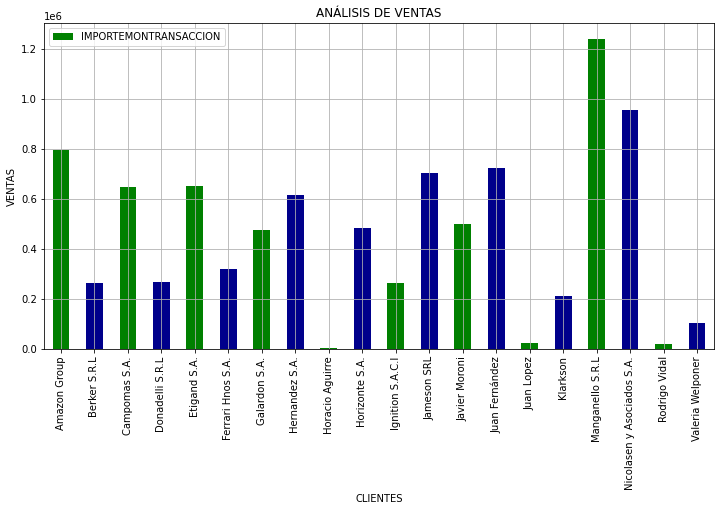

In [8]:
clientes.plot("ORGANIZACION","IMPORTEMONTRANSACCION", 
              kind="bar", 
              figsize=(12,6), 
              color=["green","darkblue"],
              grid=True, 
              title="ANÁLISIS DE VENTAS", 
              ylabel = "VENTAS",
              xlabel = "CLIENTES");

In [9]:
clientes.set_index("ORGANIZACION", inplace=True)
clientes.drop(columns=["CANTIDAD","PRECIO"], inplace=True)
clientes.head()

,IMPORTEMONTRANSACCION
ORGANIZACION,
Amazon Group,795766.00
Berker S.R.L,262700.00
Campomas S.A.,648262.00
Donadelli S.R.L,269210.00
Etigand S.A.,652421.49


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

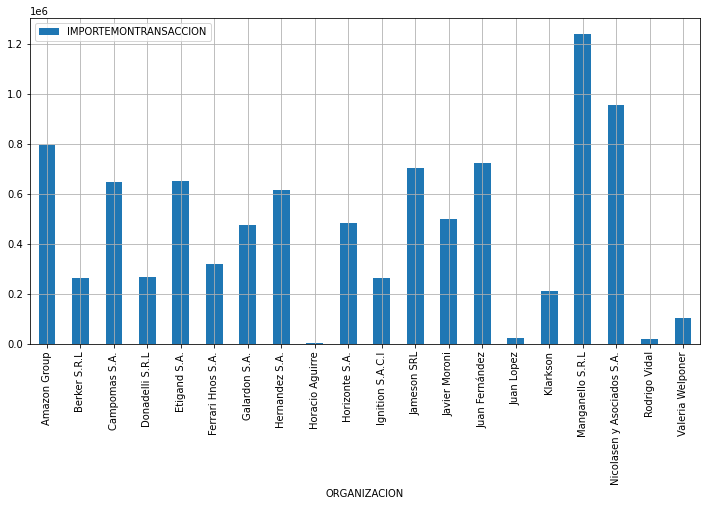

In [10]:
clientes.plot.bar(figsize=(12,6),grid=True,);

## **<font color="RoyalBlue">Gráfico de Barras horizontales**

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html

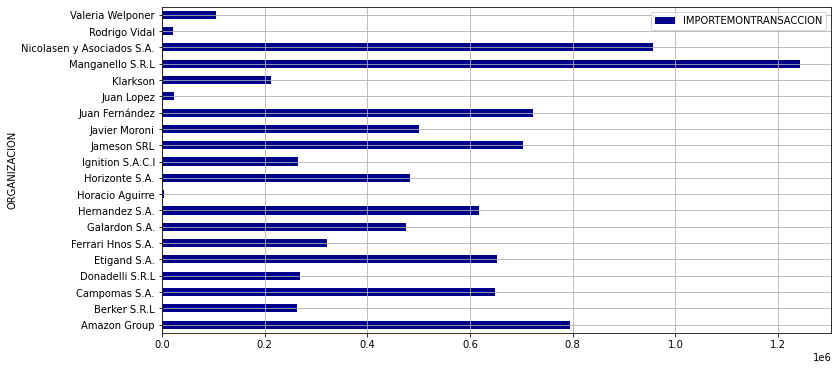

In [11]:
clientes.plot.barh(figsize=(12,6),grid=True,color="Darkblue");

## **<font color="RoyalBlue">Grafico Circular**

In [12]:
clientes = clientes[clientes.IMPORTEMONTRANSACCION > 600000]
clientes

,IMPORTEMONTRANSACCION
ORGANIZACION,
Amazon Group,795766.00
Campomas S.A.,648262.00
Etigand S.A.,652421.49
Hernandez S.A.,617565.00
Jameson SRL,703613.99
Juan Fernández,723497.00
Manganello S.R.L,1241750.00
Nicolasen y Asociados S.A.,956825.00


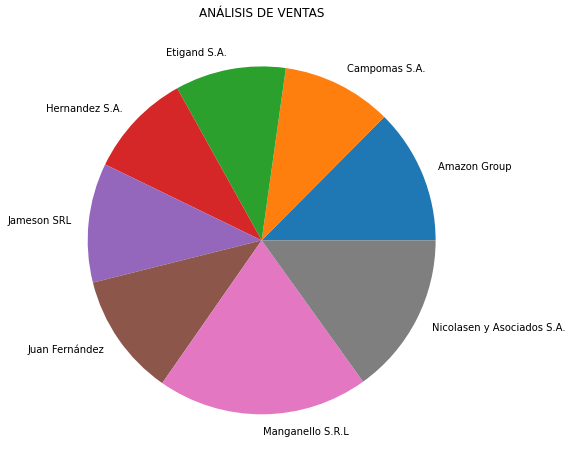

In [13]:
clientes.plot("","IMPORTEMONTRANSACCION",
              kind="pie", 
              figsize=(8,8), 
              labels = clientes.index,
              legend = "",
              ylabel = "",
              title="ANÁLISIS DE VENTAS");

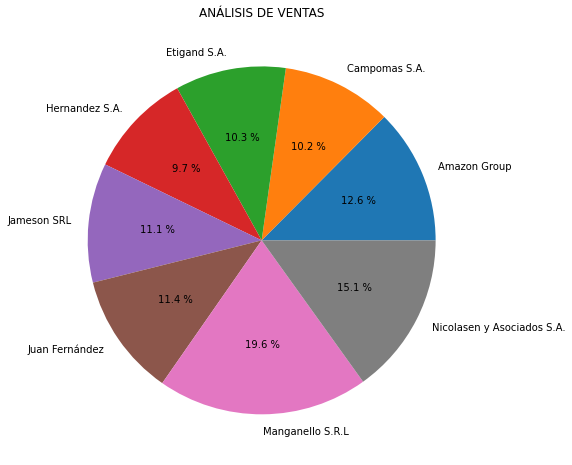

In [14]:
clientes.plot("","IMPORTEMONTRANSACCION",
              kind="pie", 
              figsize=(8,8), 
              labels = clientes.index,
              legend = "",
              ylabel = "",
              autopct="%0.1f %%",
              title="ANÁLISIS DE VENTAS");

# **<font color="RoyalBlue">Obtención de datos financieros**

In [15]:
dolar = yf.download("ARS=X", start="2023-01-03")
dolar.drop(columns=["Volume","Adj Close"], inplace=True)
dolar.reset_index(inplace=True)
dolar.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close
0,2023-01-03 00:00:00+00:00,178.148315,178.508270,177.095306,178.148315
1,2023-01-04 00:00:00+00:00,178.375839,178.734222,177.385803,178.375839
2,2023-01-05 00:00:00+00:00,178.584167,179.032043,178.042755,178.584167
3,2023-01-06 00:00:00+00:00,178.905197,179.949463,178.862473,178.905197
4,2023-01-09 00:00:00+00:00,179.071686,180.230576,178.559753,179.071686


In [16]:
bitcoin = yf.download("BTC-USD", start="2022-01-01", end="2022-01-14")
bitcoin.drop(columns=["Volume","Adj Close"], inplace=True)
bitcoin.reset_index(inplace=True)
bitcoin.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close
0,2022-01-01 00:00:00+00:00,46311.746094,47827.312500,46288.484375,47686.812500
1,2022-01-02 00:00:00+00:00,47680.925781,47881.406250,46856.937500,47345.218750
2,2022-01-03 00:00:00+00:00,47343.542969,47510.726562,45835.964844,46458.117188
3,2022-01-04 00:00:00+00:00,46458.851562,47406.546875,45752.464844,45897.574219
4,2022-01-05 00:00:00+00:00,45899.359375,46929.046875,42798.222656,43569.003906


# **<font color="RoyalBlue">Usando Plot de Pandas**


## **<font color="RoyalBlue">Gráfico Lineal**


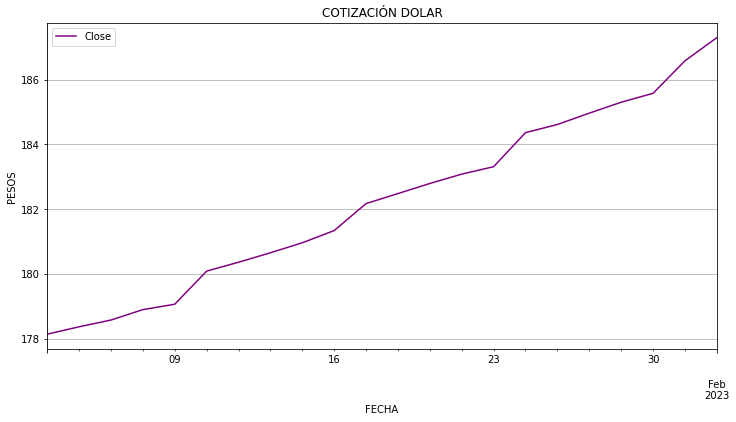

In [17]:
dolar.plot("Date","Close", 
           kind="line", 
           figsize=(12,6), 
           color="purple",
           grid=True, 
           title="COTIZACIÓN DOLAR", 
           ylabel = "PESOS",
           xlabel = "FECHA");

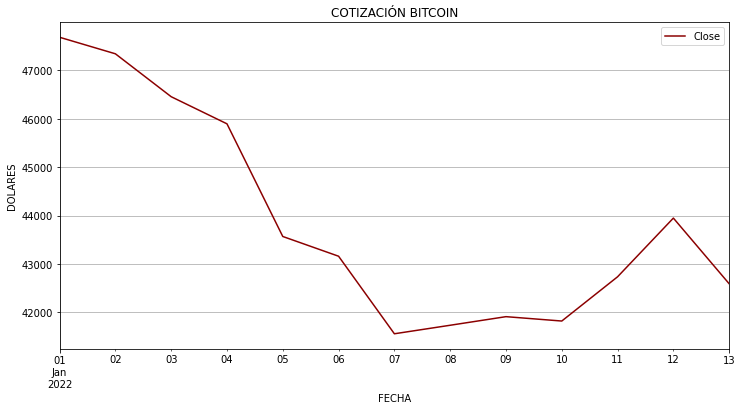

In [18]:
bitcoin.plot("Date","Close", 
            kind="line", 
            figsize=(12,6), 
            color="darkred",
            grid=True, 
            title="COTIZACIÓN BITCOIN", 
            ylabel = "DOLARES",
            xlabel = "FECHA");

In [19]:
bitcoin = yf.download("BTC-USD", start="2022-01-01", end="2022-01-14")
bitcoin.drop(columns=["Volume","Adj Close"], inplace=True)
bitcoin.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close
Date,,,,
2022-01-01 00:00:00+00:00,46311.746094,47827.312500,46288.484375,47686.812500
2022-01-02 00:00:00+00:00,47680.925781,47881.406250,46856.937500,47345.218750
2022-01-03 00:00:00+00:00,47343.542969,47510.726562,45835.964844,46458.117188
2022-01-04 00:00:00+00:00,46458.851562,47406.546875,45752.464844,45897.574219
2022-01-05 00:00:00+00:00,45899.359375,46929.046875,42798.222656,43569.003906


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html

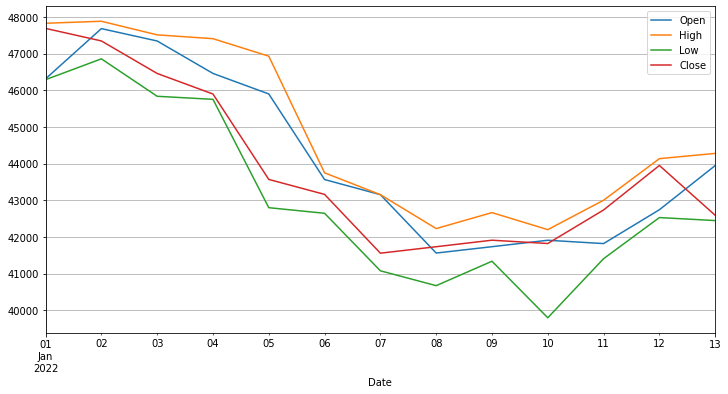

In [20]:
bitcoin.plot.line(figsize=(12,6),grid=True);

## **<font color="RoyalBlue">Gráfico de Caja**


In [21]:
bitcoin = yf.download("BTC-USD", start="2022-01-01", end="2022-01-14")
bitcoin.drop(columns=["Volume","Adj Close"], inplace=True)
bitcoin.reset_index(inplace=True)
bitcoin.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close
0,2022-01-01 00:00:00+00:00,46311.746094,47827.312500,46288.484375,47686.812500
1,2022-01-02 00:00:00+00:00,47680.925781,47881.406250,46856.937500,47345.218750
2,2022-01-03 00:00:00+00:00,47343.542969,47510.726562,45835.964844,46458.117188
3,2022-01-04 00:00:00+00:00,46458.851562,47406.546875,45752.464844,45897.574219
4,2022-01-05 00:00:00+00:00,45899.359375,46929.046875,42798.222656,43569.003906


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.box.html

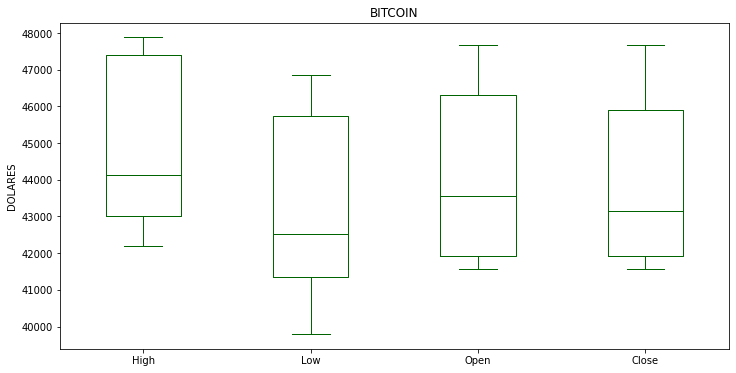

In [22]:
bitcoin.plot("Date",["High","Low","Open","Close"], 
             kind="box", 
             figsize=(12,6), 
             color="darkgreen", 
             title="BITCOIN", 
             ylabel = "DOLARES");

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html#pandas.DataFrame.boxplot

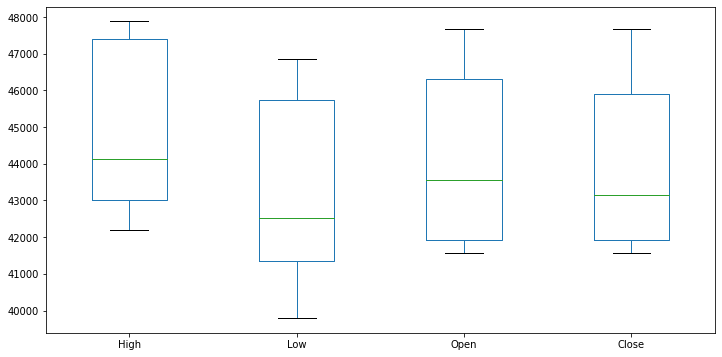

In [23]:
bitcoin.boxplot(column=["High", "Low", "Open", "Close"],
                figsize=(12,6),
                grid=False);      

---
<p>
<font color="RoyalBlue">

**Hemos llegado al fin de este cuaderno, felicitaciones estamos avanzando en Pandas, ahora a seguir en el proximo cuaderno...** 
</font>
</p>

---

# 😀

![](https://everisgroup.sharepoint.com/sites/BrandCenter/Shared%20Documents/Logo/FUTURE%20AT%20HEART/BLACK/FUTURE-HEARTH.png)